In [373]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [374]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [375]:
len(words)

32033

In [376]:
# Building the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)


{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [377]:
# # building the dataset

# block_size = 3      # context length: number of characters we look at to predict the next one
# X, Y = [], []
# for w in words:
#     # print(w)
#     context = [0] * block_size
#     for ch in w + '.':
#         ix = stoi[ch]
#         X.append(context)
#         Y.append(ix)
#         # print(''.join(itos[i] for i in context), '---->', itos[ix])
#         context = context[1:] + [ix]        # crop and append

# X = torch.tensor(X)
# Y = torch.tensor(Y)


In [378]:
def build_dataset(words):
    X, Y = [], []
    for w in words:
        # print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            # print(''.join(itos[i] for i in context), '---->', itos[ix])
            context = context[1:] + [ix]        # crop and append

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

block_size = 3      # context length: number of characters we look at to predict the next one

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [379]:
# X.shape, X.dtype, Y.shape, Y.dtype

In [380]:
# C = torch.randn((27, 2))

In [381]:
# C

In [382]:
# C[5]

In [383]:
# F.one_hot(torch.tensor(5), num_classes=27)

In [384]:
# F.one_hot(torch.tensor(5), num_classes=27).float() @ C

In [385]:
# C = torch.randn((27, 2))

In [386]:
# C[X]

In [387]:
# X[13, 2]

In [388]:
# C[X][13,2]

In [389]:
# C[1]

In [390]:
# emb = C[X]

In [391]:
# emb.shape

In [392]:
# W1 = torch.randn((3*2, 100))
# b1 = torch.randn(100)
# print(W1.shape,b1.shape)

In [393]:
# emb @ W1 + b1           # This is what we want to do but can't because shapes dont match 6 in W1 and 3*2 in emb

In [394]:
# torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], dim = 1).shape

In [395]:
# torch.cat(torch.unbind(emb, 1), dim=1).shape           # one of the ways to change shapes but uses extra memory know as storage in tensors. Use view instead.

In [396]:
# a = torch.arange(18)
# a

In [397]:
# a.shape

In [398]:
# a.view([3, 3, 2])

In [399]:
# emb.view(32, 6) == torch.cat(torch.unbind(emb, 1), dim=1)

In [400]:
# h = torch.tanh(emb.view(-1, 6) @ W1 + b1)        # Instead of -1, you can also do emb.shape[0]

In [401]:
# h

In [402]:
# h.shape

In [403]:
# W2 = torch.randn((100, 27))
# b2 = torch.randn(27)

In [404]:
# logits = h @ W2 + b2

In [405]:
# logits.shape

In [406]:
# counts = logits.exp()

In [407]:
# prob = counts / counts.sum(1, keepdim=True)

In [408]:
# prob.shape

In [409]:
# prob.sum(1)

In [410]:
# torch.arange(32)

In [411]:
# Y

In [412]:
# loss = -prob[torch.arange(32), Y].log().mean()
# loss

#### Rewriting for clarity

In [413]:
Xtr.shape, Ytr.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [414]:
g = torch.Generator().manual_seed(2147483647)      # For reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters =[C, W1, b1, W2, b2]

In [415]:
sum(p.nelement() for p in parameters)       # number of parameters in total

11897

In [416]:
# emb = C[X]      # (32, 3, 2)
# h = torch.tanh(emb.view(-1, 6) @ W1 + b1)       # (32, 100)
# logits = h @ W2 + b2          #   (32, 27)
# # counts = logits.exp()
# # prob = counts / counts.sum(1, keepdim=True)
# # loss = -prob[torch.arange(32), Y].log().mean()
# loss = F.cross_entropy(logits, Y)          # the same thing as above 3 lines
# # loss

In [417]:
# F.cross_entropy(logits, Y)        # many benefits. 1. forward pass efficient. 2. Backward pass efficient. 3. Numerical values much more well behaved 

In [418]:
for p in parameters:
    p.requires_grad = True

In [419]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [420]:
lri = []
lossi = []
stepi = []


In [421]:

for i in range(200000):

    # Mini Batches
    ix = torch.randint(0, Xtr.shape[0], (32,))

    # Forward pass
    emb = C[Xtr[ix]]      # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1)       # (32, 100)
    logits = h @ W2 + b2          #   (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])

    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()


    # Update
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad

    # track stats
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())


print(loss.item())

2.1443233489990234


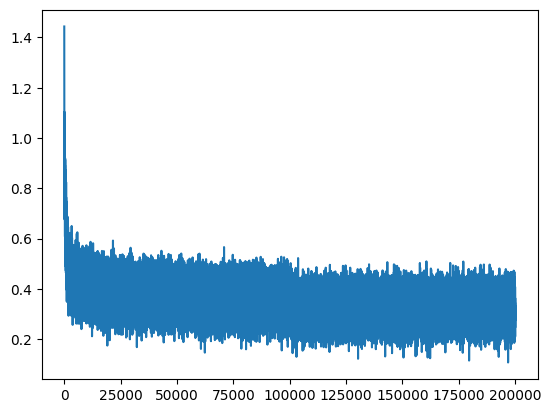

In [422]:
plt.plot(stepi, lossi)

In [423]:
# plt.plot(lri, lossi)

In [424]:
emb = C[Xtr]      # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)       # (32, 100)
logits = h @ W2 + b2          #   (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1379, grad_fn=<NllLossBackward0>)

In [425]:
emb = C[Xdev]      # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)       # (32, 100)
logits = h @ W2 + b2          #   (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1787, grad_fn=<NllLossBackward0>)

In [426]:
# # visualize dimensions 0 and 1 of the embedding matrix C for all characters
# plt.figure(figsize=(8,8))
# plt.scatter(C[:,0].data, C[:,1].data, s=200)
# for i in range(C.shape[0]):
#     plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
# plt.grid('minor')

In [428]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 100)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

felynn.
alen.
jai.
daver.
hadna.
dalco.
niper.
cie.
allavalani.
liyah.
pely.
khi.
fahanis.
myiah.
hei.
irille.
hayn.
kavia.
mak.
vedobekra.
